### Exercise 9.1: 
Write a program, or modify the one from Example 9.1, to solve Poisson's equation for the system described in Example 9.2. Work in units where $\epsilon_0 = 1$ and continue the iteration until your solution for the electric potential changes by less than $10^{-6} V$ per step at every grid point. 
***

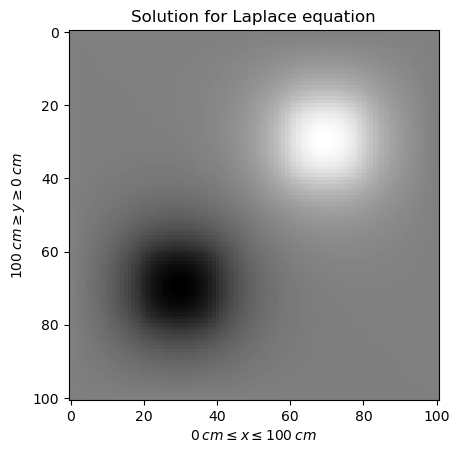

In [25]:
# cell 1 

import numpy as np 
import pylab as plt

    # Constants
M = 100  # Amount of pixels on a side
V = 1    # voltage at top wall 
t = 1e-6 # Target accuracy 
a = .01    #m

    # Arrays holding information 
phi = np.zeros([M+1,M+1],float)
dphi = np.empty([M+1, M+1], float)

rho = np.zeros([M+1,M+1],float)
rho[60:80,20:40] = -1.0
rho[20:40,60:80] = 1.0

    # loop
delta = 1
while delta > t :
    
        # Calculating potential values 
    for i in range(M+1):
        for j in range(M+1):
            if i == 0 or i == M or j == 0 or j == M:
                dphi[i,j] = phi[i,j]
            else: 
                dphi[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1] \
                      + (rho[i,j]*a**2 )/4 )/4 
                    
    delta = np.max(abs(phi - dphi))
    phi,dphi = dphi,phi

    # output 
plt.imshow(phi)
plt.title("Solution for Laplace equation")
plt.ylabel(r'$ 100 \: cm \geq y \geq 0 \: cm$')
plt.xlabel(r'$ 0 \: cm \leq x \leq 100 \: cm$')
plt.gray()
plt.show()